In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import re
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk

In [ ]:
!unzip /content/drive/MyDrive/SHAI/shai-training-2023-a-level-2.zip

Archive:  /content/drive/MyDrive/SHAI/shai-training-2023-a-level-2.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               
  inflating: sample_submission.csv   


In [ ]:
train=pd.read_csv('/content/Train.csv')

In [ ]:
valid=pd.read_csv('/content/Valid.csv')

In [ ]:
test=pd.read_csv('/content/Test.csv')

In [ ]:
train.shape

(40000, 2)

In [ ]:
test.shape

(5000, 3)

In [ ]:
valid.shape

(5000, 2)

In [ ]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


#EDA

Text(0.5, 1.0, 'count label')

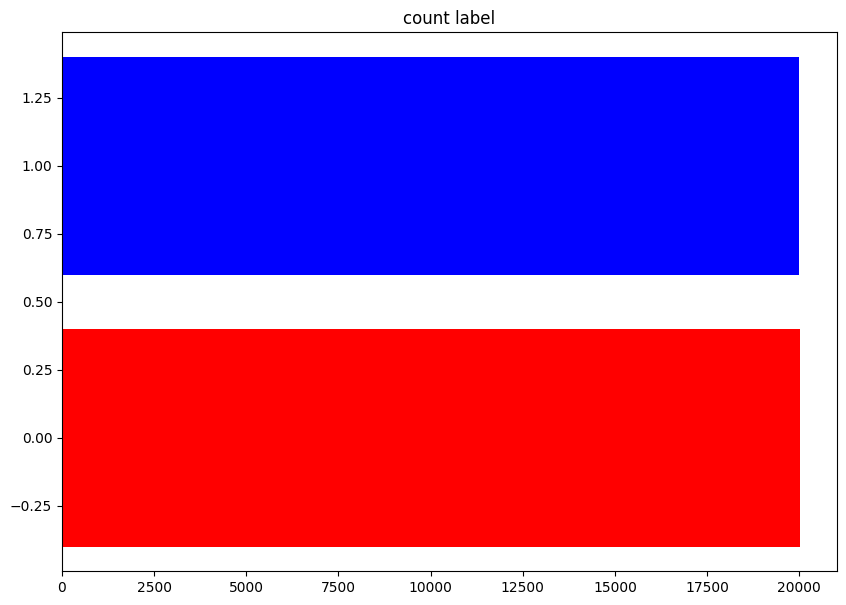

In [ ]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(10,7))
plt.barh(train['label'].unique(),
         train['label'].value_counts(),
         color=['red','blue'])
plt.title('count label')

In [ ]:
def movie_count(data):
  count=data.groupby('label').count()
  return count

In [ ]:
train_count=movie_count(train)
train_count

,text
label,
0,20019
1,19981


Text(0.5, 1.0, 'train count')

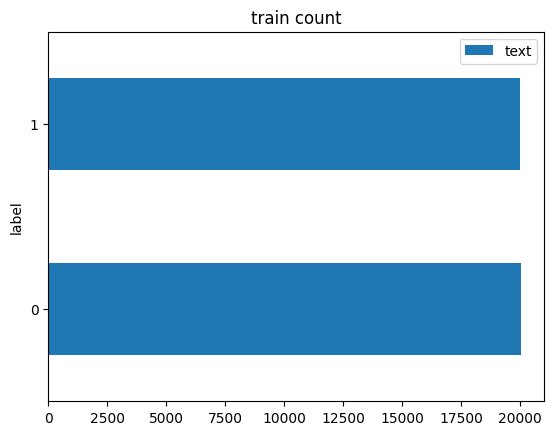

In [ ]:
train_count.plot.barh()
plt.title('train count')

#count of valid 

In [ ]:
valid_count=movie_count(valid)
valid_count

,text
label,
0,2486
1,2514


<Axes: ylabel='label'>

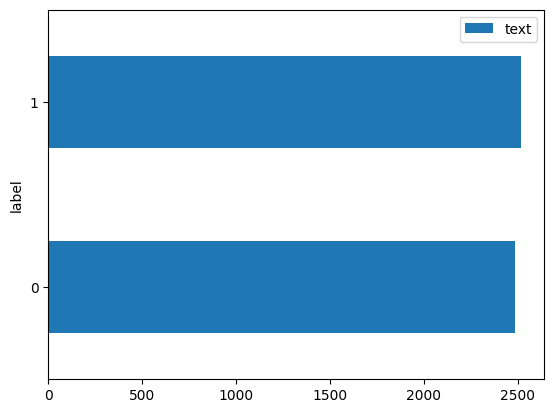

In [ ]:
valid_count.plot.barh()

#word_count

In [ ]:
train['word_count']=train['text'].apply(lambda x:len(x.split(" ")))
train['word_count']

0        151
1        326
2        184
3         69
4        178
        ... 
39995    541
39996     50
39997    168
39998    168
39999    137
Name: word_count, Length: 40000, dtype: int64

In [ ]:
train['word_count'].describe()

count    40000.000000
mean       231.328975
std        171.178333
min          4.000000
25%        126.000000
50%        173.000000
75%        282.000000
max       2470.000000
Name: word_count, dtype: float64

#char_count

In [ ]:
train['char_count']=train['text'].apply(len)
train['char_count']

0         874
1        1811
2         983
3         351
4         983
         ... 
39995    3111
39996     291
39997    1092
39998    1045
39999     727
Name: char_count, Length: 40000, dtype: int64

In [ ]:
train['char_count'].describe()

count    40000.000000
mean      1310.293250
std        988.358599
min         32.000000
25%        698.000000
50%        973.000000
75%       1596.000000
max      13704.000000
Name: char_count, dtype: float64

#vocab

In [ ]:
vocab=[word for text in train['text'] for word in text.split(" ")]
vocab=Counter(vocab)

#least common

In [ ]:
vocab.most_common()[:-10]

[('the', 454993),
 ('a', 246017),
 ('and', 242020),
 ('of', 226960),
 ('to', 209658),
 ('is', 162520),
 ('in', 135736),
 ('I', 106137),
 ('that', 101520),
 ('this', 91009),
 ('it', 86574),
 ('/><br', 80731),
 ('was', 74145),
 ('as', 66676),
 ('with', 65924),
 ('for', 64868),
 ('The', 53803),
 ('but', 53203),
 ('on', 48932),
 ('movie', 48764),
 ('are', 45121),
 ('have', 43348),
 ('film', 43320),
 ('his', 43094),
 ('not', 41672),
 ('you', 40940),
 ('be', 40431),
 ('at', 33972),
 ('by', 33712),
 ('he', 33550),
 ('one', 33087),
 ('an', 32890),
 ('from', 30458),
 ('who', 29869),
 ('like', 28925),
 ('all', 28222),
 ('they', 28079),
 ('just', 25995),
 ('has', 25966),
 ('so', 25890),
 ('or', 25863),
 ('about', 25776),
 ('her', 23871),
 ('out', 23025),
 ('some', 22502),
 ('very', 20573),
 ('more', 20349),
 ('This', 19533),
 ('would', 18856),
 ('what', 18603),
 ('good', 18180),
 ('when', 18084),
 ('if', 17639),
 ('their', 17447),
 ('only', 17372),
 ('It', 17276),
 ('really', 17130),
 ('had', 171

In [ ]:
vocab.most_common(n=10)

[('the', 454993),
 ('a', 246017),
 ('and', 242020),
 ('of', 226960),
 ('to', 209658),
 ('is', 162520),
 ('in', 135736),
 ('I', 106137),
 ('that', 101520),
 ('this', 91009)]

(array([2.8097e+04, 8.6960e+03, 2.2510e+03, 8.0100e+02, 1.3900e+02,
        7.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([   4. ,  250.6,  497.2,  743.8,  990.4, 1237. , 1483.6, 1730.2,
        1976.8, 2223.4, 2470. ]),
 <BarContainer object of 10 artists>)

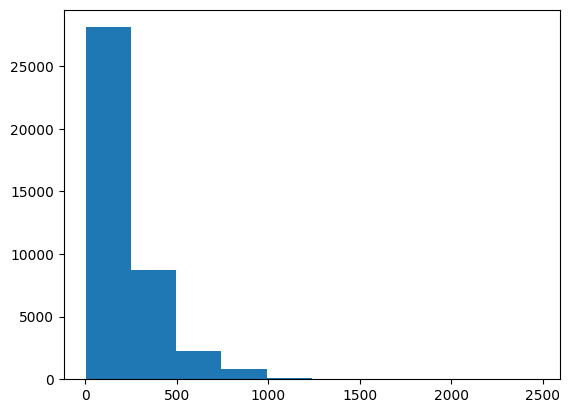

In [ ]:
plt.hist(train['word_count'])

(array([2.7856e+04, 8.7030e+03, 2.3780e+03, 8.0900e+02, 2.3600e+02,
        9.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([   32. ,  1399.2,  2766.4,  4133.6,  5500.8,  6868. ,  8235.2,
         9602.4, 10969.6, 12336.8, 13704. ]),
 <BarContainer object of 10 artists>)

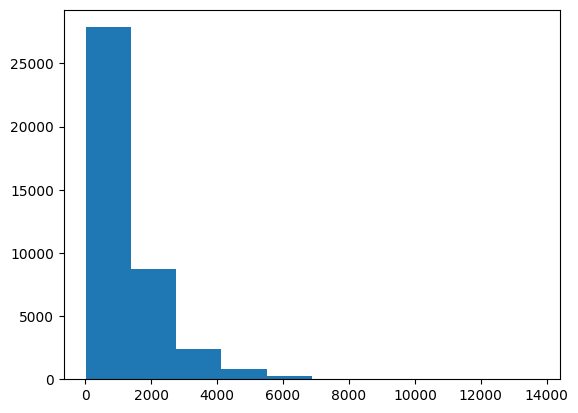

In [ ]:
plt.hist(train['char_count'])

#Lemmatizer

In [ ]:
# Load lemmatizer
# from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet')
# lemmatizer = WordNetLemmatizer()

In [ ]:
# Lemmatize text
# train['text'] = train['text'].apply(lambda x: lemmatizer.lemmatize(x))
# valid['text'] = valid['text'].apply(lambda x: lemmatizer.lemmatize(x))
# test['text'] = test['text'].apply(lambda x: lemmatizer.lemmatize(x))

#Tokininzer
# vectorize text 

In [ ]:
vocab_size=5000
batch_size=64
max_length=400
# max_sequence=24 #max number of word in each text
embeding_dim=128 #dimention of embedded  layers

In [ ]:
## create tokinizer object
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size,
                                                filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                                lower=True,
                                                split=' ',
                                                oov_token=True,
                                                )

tokenizer.fit_on_texts(train['text'])

##preview the word index
word_index=tokenizer.word_index
print({k:word_index[k] for  k in list(word_index)[:10]})

{True: 1, 'the': 2, 'and': 3, 'a': 4, 'of': 5, 'to': 6, 'is': 7, 'br': 8, 'in': 9, 'it': 10}


#test

In [ ]:
## let see how tokinizer work
text="thinking of you everything crossed turn"
seq=tokenizer.texts_to_sequences([text])
print(seq)

[[535, 5, 22, 267, 1, 482]]


#Sequences

In [ ]:
seqv=tokenizer.texts_to_sequences(train['text'])
sequ=tokenizer.texts_to_sequences(valid['text'])
seqt=tokenizer.texts_to_sequences(test['text'])

##Padding NLP

In [ ]:
padded_seq=tf.keras.preprocessing.sequence.pad_sequences(seqv,maxlen=max_length,
                                                         padding='post')
padded_seqv=tf.keras.preprocessing.sequence.pad_sequences(sequ,maxlen=max_length,
                                                          padding='post')
padded_seqt=tf.keras.preprocessing.sequence.pad_sequences(seqt,maxlen=max_length,
                                                          padding='post')

##standered preprocess steps

In [ ]:
x_train=padded_seq
y_train=train.label
x_valid=padded_seqv
y_valid=valid.label

In [ ]:
y_train=train['label'].tolist()
y_valid=valid['label'].tolist()
y_train = np.array(y_train)
y_valid = np.array(y_valid)

#test

In [ ]:
def dataset_creator(x, y):
    dataset = tf.data.Dataset.from_tensor_slices((x, y))
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset


train_dataset = dataset_creator(x_train, y_train)
test_dataset = dataset_creator(x_valid, y_valid)

In [ ]:
# preview dataset
for x, y in train_dataset.take(1):
    print(x.shape, y.shape)
    print(x[0])
    print(y[0])

# preview dataset size
print("Train dataset size: ", len(train_dataset))
print("Test dataset size: ", len(test_dataset))

(64, 400) (64,)
tf.Tensor(
[   1 1223  326  266    6 1116   86    6    1   41   31    1   12  827
    6  164   19 1629  176   18   28    5    2 1537  412    5  410    9
    2  225   20   11   90   94  283   22   90   94  283  198   36  163
  283  511    8    8   92  222    2  114   61    7   40 2665   10  209
   27  107    6   27 2382   58  933 1679    7    2  684    1 2760 2595
 2742  257   36    7  699  880   41  412  124    5  138  245  130    1
    6  978   91   54  191  303    2  908  372  416   27  345 1101  222
    2 4908 1635    3  338    1  218    3   25 1369   36  285   38   13
  118 1034    1  129    5    2    1    1   62    1    3  345 1028    8
    8    2   20   46   79   75  741   32  298   36    7    1    5 2390
    4  360   57 2565  130    3    2  626    5 2602  472    7  489    2
  225  149 3443  124   18    2 1746  281  218    9 1244   18    4 2009
    5    1   21    1    8    8   19 3596   74   30  120   87  383   12
  149    7   35  480   38    6 2599   48    5    2

#Modeling

In [ ]:
lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.0001, patience=3, verbose=0)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0)

In [ ]:
bilstm_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embeding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Define the checkpoint callback
checkpoint_path = '/content/drive/MyDrive/SHAI/bilstm_2.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='binary_accuracy', save_best_only=True, mode='max', verbose=1)

bilstm_model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
bilstm_model.fit(train_dataset, epochs=10, validation_data=test_dataset, callbacks=[lr_reduce, es_callback, checkpoint_callback])

Epoch 1/10
624/625 [============================>.] - ETA: 0s - loss: 0.1043 - binary_accuracy: 0.9632
Epoch 1: binary_accuracy improved from -inf to 0.96328, saving model to /content/drive/MyDrive/SHAI/bilstm_2.h5
625/625 [==============================] - 76s 113ms/step - loss: 0.1043 - binary_accuracy: 0.9633 - val_loss: 0.3393 - val_binary_accuracy: 0.8868 - lr: 0.0010
Epoch 2/10
624/625 [============================>.] - ETA: 0s - loss: 0.0945 - binary_accuracy: 0.9672
Epoch 2: binary_accuracy improved from 0.96328 to 0.96718, saving model to /content/drive/MyDrive/SHAI/bilstm_2.h5
625/625 [==============================] - 36s 58ms/step - loss: 0.0947 - binary_accuracy: 0.9672 - val_loss: 0.3358 - val_binary_accuracy: 0.8870 - lr: 0.0010
Epoch 3/10
624/625 [============================>.] - ETA: 0s - loss: 0.0877 - binary_accuracy: 0.9699
Epoch 3: binary_accuracy improved from 0.96718 to 0.96992, saving model to /content/drive/MyDrive/SHAI/bilstm_2.h5
625/625 [===================

In [ ]:
x_test=padded_seqt

In [ ]:
pre = np.array(bilstm_model.predict(x_test))

157/157 [==============================] - 3s 13ms/step


In [ ]:
pred=np.round(pre,0)

In [ ]:
predi=pred.astype(int)

In [ ]:
predi

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
df = pd.DataFrame({
    'id':test['id'],
    'Label':predi[:,0],
})
df

,id,Label
0,0,0
1,1,1
2,2,0
3,3,0
4,4,0
...,...,...
4995,4995,0
4996,4996,1
4997,4997,0
4998,4998,0


In [ ]:
df.to_csv("/content/drive/MyDrive/SHAI/submission_bilstm_2.csv",index=False ,header = 1)